In [10]:
library(ggplot2)
library(dplyr)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [61]:
FL_site=read.table("./Homoeologous_Cat/FL_homoeologousSite_accumulate.txt",header=T)
FL_site=arrange(FL_site,FL)
FL_site=FL_site %>% filter(TotalSite==377)

In [66]:
mean(FL_site[1:30,]$perfect)
mean(FL_site[316:346,]$perfect)

[1] 109.0333

[1] 147.5484

In [65]:
wilcox.test(FL_site[316:346,]$perfect,FL_site[1:30,]$perfect)

Warning message in wilcox.test.default(FL_site[316:346, ]$perfect, FL_site[1:30, :
“cannot compute exact p-value with ties”



	Wilcoxon rank sum test with continuity correction

data:  FL_site[316:346, ]$perfect and FL_site[1:30, ]$perfect
W = 851.5, p-value = 2.554e-08
alternative hypothesis: true location shift is not equal to 0


In [97]:
FL_site=read.table("./Homoeologous_Cat/FU_homoeologousSite_accumulate.txt",header=T)
FL_site=FL_site %>% filter(TotalSite==361)
FL_site=arrange(FL_site,FU)
FL_site$sampleId=seq(1,346)
FL_plot=FL_site %>% pivot_longer(
    cols = c("needBoth","needExpression","needGenotype","perfect"),
    names_to = "genoType",
    values_to = "sampleCount"
)
head(FL_plot)

IID,FID,FU,TotalSite,sampleId,genoType,sampleCount
<fct>,<int>,<dbl>,<dbl>,<int>,<chr>,<int>
S301,1,80.38161,361,1,needBoth,133
S301,1,80.38161,361,1,needExpression,50
S301,1,80.38161,361,1,needGenotype,62
S301,1,80.38161,361,1,perfect,116
S305,1,81.28786,361,2,needBoth,136
S305,1,81.28786,361,2,needExpression,41


png 
  2

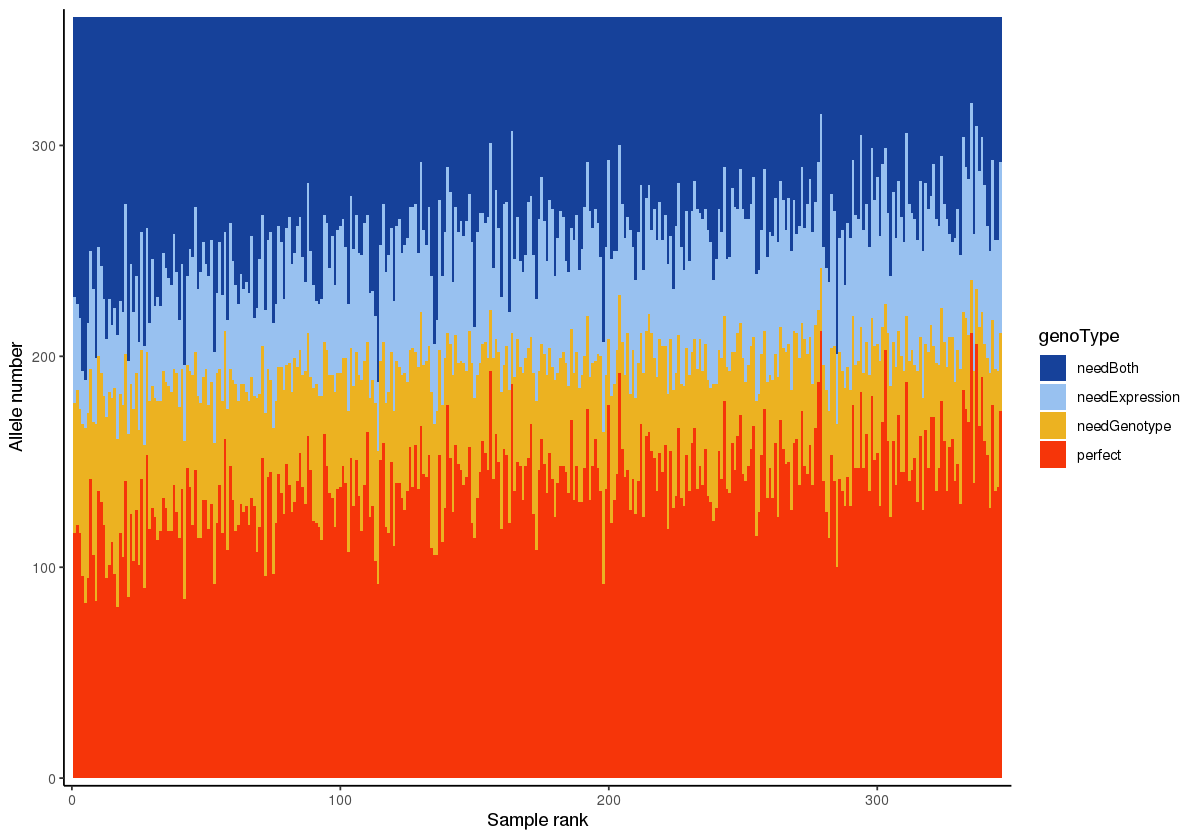

In [98]:
options(repr.plot.width=10,repr.plot.heigh=5)
p=FL_plot %>% ggplot(
    aes(y = sampleCount, x = sampleId, fill = genoType)
    ) +
    geom_bar(stat = "identity", width = 1) +
    scale_fill_manual(
        values = c("#16419a","#98c1f0","#ecb221","#f63509")
    )+
    theme_classic()+
    scale_x_continuous(expand = c(0.01,0.01))+
    scale_y_continuous(expand = c(0.01,0.01))+
    xlab("Sample rank")+
    ylab("Allele number")
pdf("FU_perfect_ratio.pdf",width = 6,height = 3)
print(p)
dev.off()
p

In [8]:
#----------------------------------------------
#* 候选基因在两个亚组间的统计
#----------------------------------------------
plotData=data.frame(
    triat=c('FE','FL','FS','FU','total'),
    AtCount=c(430,133,258,155,581),
    DtCount=c(447,178,397,153,674)
)

In [2]:
#---------------------------------------------------------
#TODO: 筛选基因对
#? 筛选标准，两种基因型对应的样本其Bias Score值存在显著差异
#---------------------------------------------------------
FL_BiasRatio=read.table("./Bias_ratio/FS_gene_Biasratio.txt",header = T)

#* FL 在三种类型（increase,decrease,nosignificant）位点上的占比：153, 155, 69 
#* FS 在三种类型（increase,decrease,nosignificant）位点上的占比：358, 325, 149
#* FU 在三种类型（increase,decrease,nosignificant）位点上的占比：143, 136, 82 
#* FE 在三种类型（increase,decrease,nosignificant）位点上的占比：504, 479, 181 

In [44]:
a=c(143, 136, 82)
a[1]/sum(a)
a[2]/sum(a)
a[3]/sum(a)

[1] 0.3961219

[1] 0.3767313

[1] 0.2271468

In [41]:
a[1]/sum(a)
a[1]/sum(a)

[1] 0.4302885

[1] 0.4302885

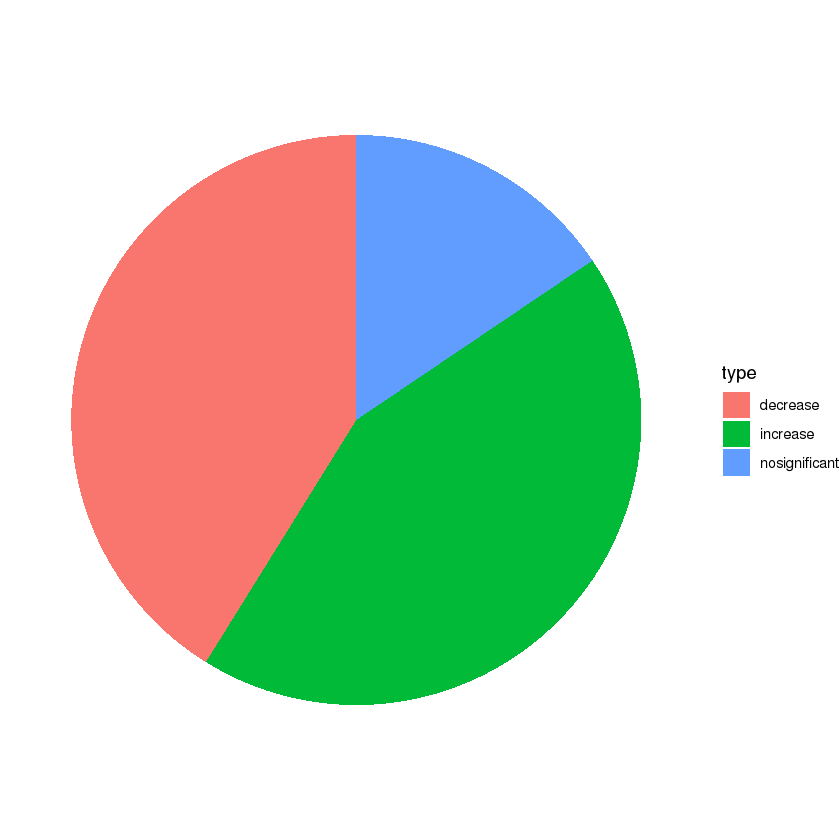

In [2]:
#-------------------------------------------------------
# TODO 基因对分成3类
#* BiasRatio在两种基因型中存在显著差异
#-------------------------------------------------------
df <- data.frame(type = c("increase", "decrease", "nosignificant"), count = c(504, 479, 181))
p <- df %>% ggplot(
    aes(x = "Content", y = count, fill = type)
) +
    geom_bar(stat = "identity", position = "stack") +
    coord_polar(theta = "y") +
    theme_void()
# pdf("./Bias_ratio/FE_GeneRatio.pdf")
# print(p)
# dev.off()
p

In [21]:
FL_BiasRatio=read.table("./Bias_ratio/FU_gene_Biasratio.txt",header = T)
head(FL_BiasRatio)

,genePair,stage,superior,unsperior,U1,pval
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Ghir_A01G002990-Ghir_D01G002950,4D,0.13676856,0.07781547,22284,2.973908e-15
2,Ghir_A01G017420-Ghir_D01G018980,4D,0.56303591,0.38019377,2752,1.757588e-04
3,Ghir_A01G017490-Ghir_D01G019050,4D,0.16913986,0.19020989,1656,7.511067e-01
4,Ghir_A01G018190-Ghir_D01G019910,4D,0.79030195,0.24420436,4533,4.731952e-08
5,Ghir_A02G001910-Ghir_D02G002060,4D,0.05399235,0.27287252,638,1.125501e-13
6,Ghir_A02G005340-Ghir_D02G005670,4D,0.18252493,0.16195853,19464,8.347845e-04


In [23]:
#* 统计基因对在两类材料Bias ratio差异的Pval
stateData=FL_BiasRatio %>%
    filter(pval < 0.05 & superior > unsperior)

wilcox.test(
    stateData$superior,stateData$unsperior
)


	Wilcoxon rank sum test with continuity correction

data:  stateData$superior and stateData$unsperior
W = 14649, p-value = 5.155e-07
alternative hypothesis: true location shift is not equal to 0


png 
  2

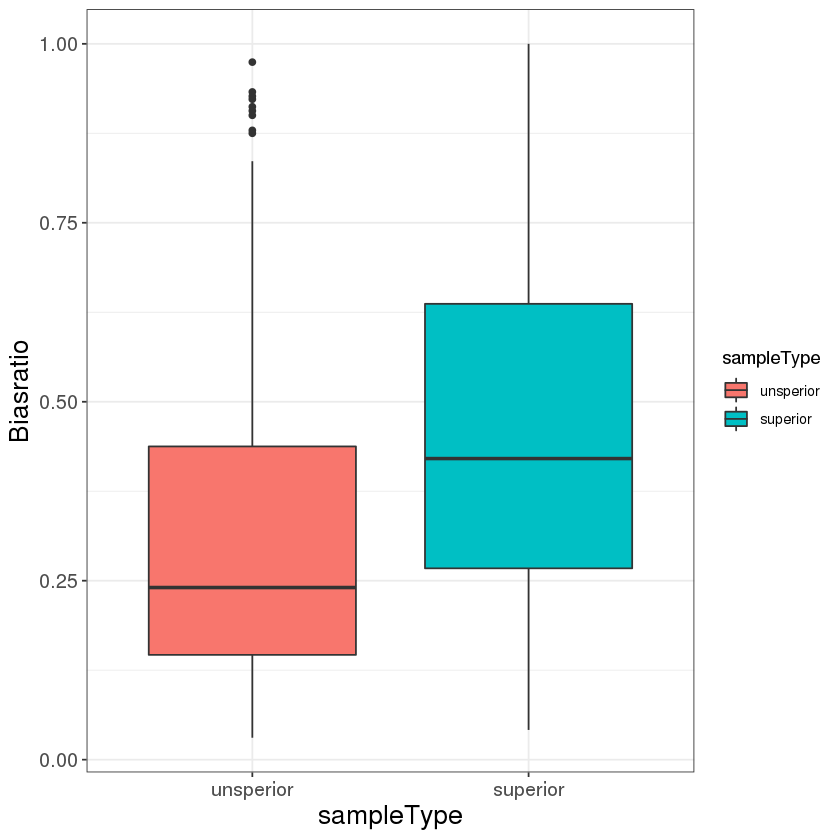

In [16]:
FL_BiasRatio=read.table("./Bias_ratio/FE_gene_Biasratio.txt",header = T)
tmpData=FL_BiasRatio %>%
    filter(pval < 0.05 & superior > unsperior) %>%
    pivot_longer(cols = c(superior, unsperior), names_to = c("sampleType"), values_to = c("Biasratio"))
tmpData$sampleType=factor(tmpData$sampleType,levels = c("unsperior","superior"))
p <-  tmpData%>%
    ggplot(
        aes(x = sampleType, y = Biasratio, fill = sampleType)
    ) +
    geom_boxplot() +
    theme_bw() +
    theme(
        axis.title = element_text(size = 16),
        axis.text = element_text(size = 12)
    )
pdf("Bias_ratio/FE_filter_Gene_BiasIncrease.pdf")
print(p)
dev.off()
p

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



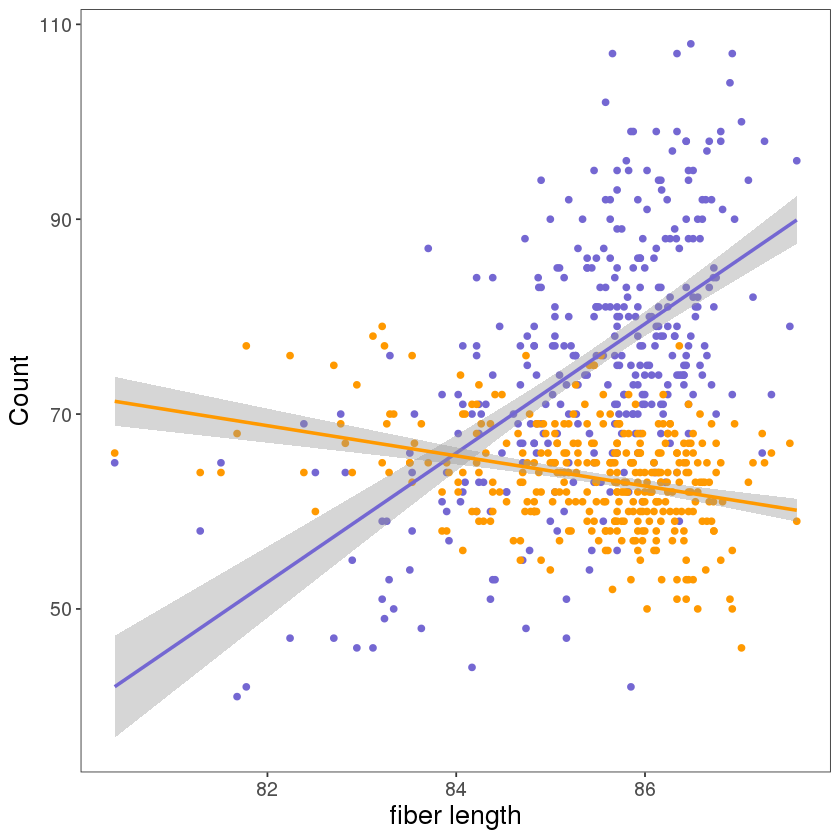

In [36]:
#-----------------------------------------------------------
#TODO 绘制散点图
#-----------------------------------------------------------
FL_GWAS_site=read.table("./Bias_ratio/FU_filterGene_GWAS_site_accumulate.txt",header=T)
FL_BiasCount=read.table("./Bias_ratio/FU_filter_BiasCount.txt",header=T)
FL_GWAS_site$dtype='superiorCount'
FL_BiasCount$dtype='BiasCount'

p=FL_GWAS_site %>% ggplot(
        aes(x=FU,y=superior))+
        geom_point(color='#7467d2')+
        geom_point(
            data=FL_BiasCount,
            aes(x=FU,y=BiasCount),inherit.aes = F,
            color='#ff9900'
        )+
        geom_smooth(  
            method = 'lm',
            color="#7467d2"
        )+
        geom_smooth(
            data=FL_BiasCount,
            aes(x=FU,y=BiasCount),inherit.aes = F,
            color='#ff9900',
            method = 'lm'
        )+
        theme_bw()+
        ylab("Count")+
        xlab("fiber length")+
        theme(
            axis.title = element_text(size=16),
            axis.text = element_text(size=12),
            panel.grid = element_blank(),
            panel.background = element_blank()
        )

pdf("Bias_ratio/FU_GeneCount_GWASSite.pdf",width = 4,height = 3)
print(p)
dev.off()
p

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



png 
  2

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



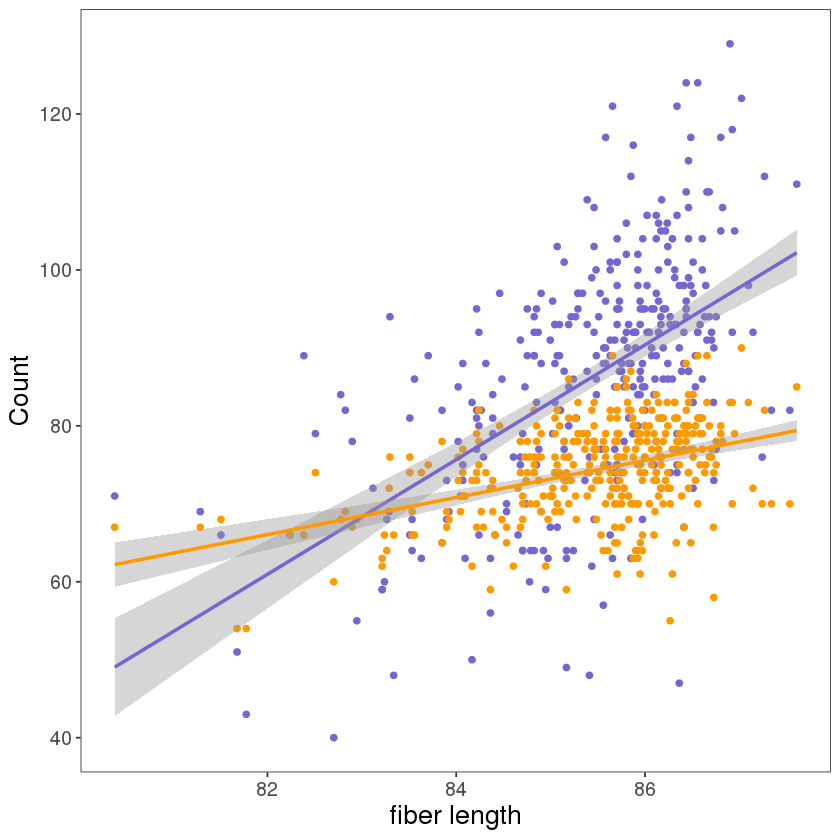

In [37]:
#-----------------------------------------------------------
#TODO 绘制散点图
#-----------------------------------------------------------
FL_GWAS_site=read.table("./Bias_ratio/FU_Increase_GWAS_site_accumulate.txt",header=T)
FL_BiasCount=read.table("./Bias_ratio/FU_filter_increase_BiasCount.txt",header=T)
FL_GWAS_site$dtype='superiorCount'
FL_BiasCount$dtype='BiasCount'

p=FL_GWAS_site %>% ggplot(
        aes(x=FU,y=superior))+
        geom_point(color='#7467d2')+
        geom_point(
            data=FL_BiasCount,
            aes(x=FU,y=BiasCount),inherit.aes = F,
            color='#ff9900'
        )+
        geom_smooth(  
            method = 'lm',
            color="#7467d2"
        )+
        geom_smooth(
            data=FL_BiasCount,
            aes(x=FU,y=BiasCount),inherit.aes = F,
            color='#ff9900',
            method = 'lm'
        )+
        theme_bw()+
        ylab("Count")+
        xlab("fiber length")+
        theme(
            axis.title = element_text(size=16),
            axis.text = element_text(size=12),
            panel.grid = element_blank(),
            panel.background = element_blank()
        )

pdf("Bias_ratio/FU_GeneCount_Increase_GWASSite.pdf",width = 4,height = 3)
print(p)
dev.off()
p

In [2]:
#-----------------------------------------------------
# TODO 分析候选基因和同源基因表达
# ? 每个基因在多少个样本中FPKM大于1
# ? 每个基因在所有样本中的表达中位数
#----------------------------------------------------- 
geneExpressData=read.table("./homoeoGene_expression.txt",header=T,sep="\t")
geneExpressData$sampleLevel=as.integer(as.character(as.vector(cut(
    geneExpressData$sampleCount,
    c(-Inf, 25, 50, 100, 150, 200, 250, 300, 350,Inf),
    labels = seq(1, 9, 1),
    right = F
))))


png 
  2

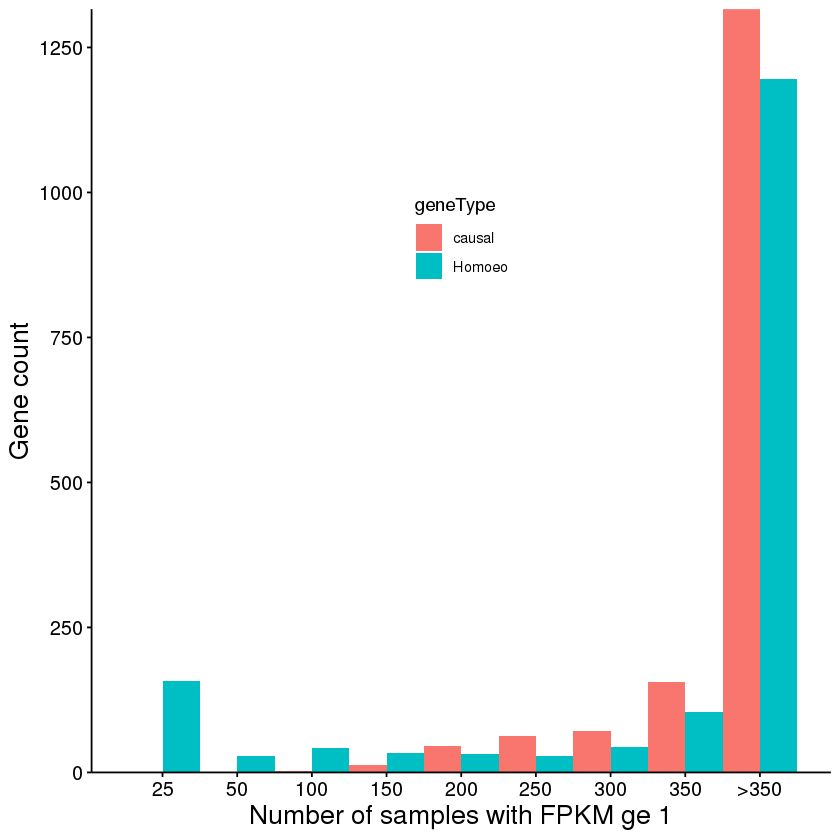

In [41]:
#* 基因到多少个样本中表达水平超过1
p <- geneExpressData %>% ggplot(
    aes(x = sampleLevel, fill = geneType)
) +
    geom_histogram(
        bins = 9,
        position = position_dodge()
    ) +
    theme_classic() +
    theme(
        legend.position = c(0.5, 0.7)
    ) +
    scale_x_continuous(
        labels = c(25, 50, 100, 150, 200, 250, 300, 350, ">350"),
        breaks = seq(1, 9)
    ) +
    scale_y_continuous(
        expand = c(0, 0)
    ) +
    xlab("Number of samples with FPKM ge 1")+
    ylab("Gene count")+
    base_theme

pdf("geneExpressionSampleCount.pdf")
print(p)
dev.off()
p

In [6]:
geneExpressData %>% filter(sampleCount>=350) %>% count(geneType)

geneType,n
<fct>,<int>
causal,1316
Homoeo,1195


In [8]:
geneExpressData %>% group_by(geneType) %>% summarise(mean(medianVal))

geneType,mean(medianVal)
<fct>,<dbl>
causal,21.77828
Homoeo,20.97604


Warning message:
“Removed 70 rows containing non-finite values (`stat_density()`).”


png 
  2

Warning message:
“Removed 70 rows containing non-finite values (`stat_density()`).”


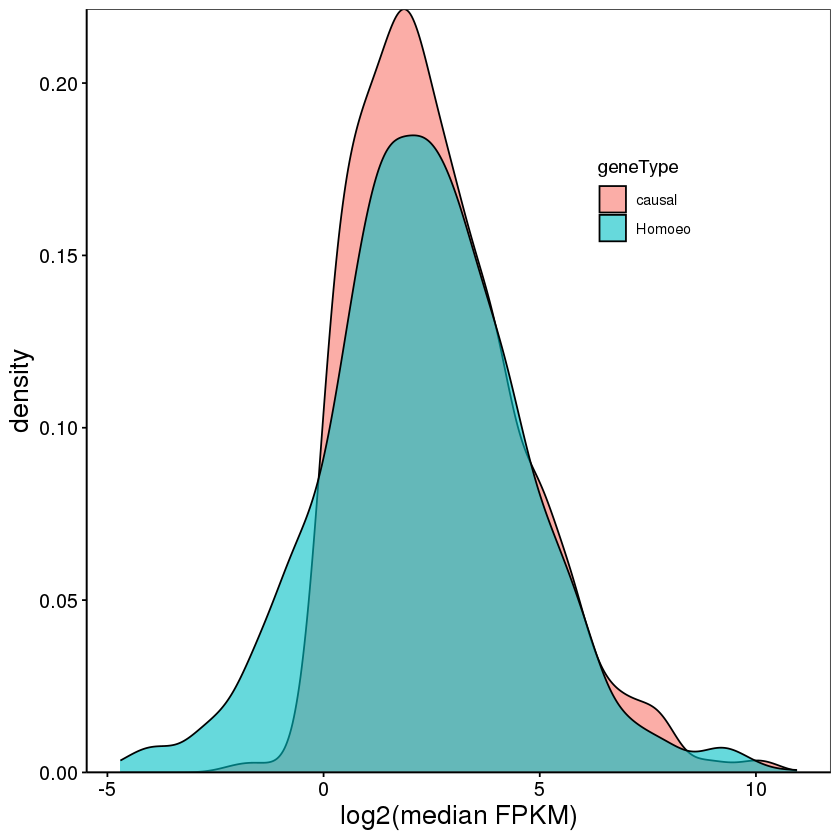

In [57]:
#---------------------------------------------------
#TODO 两种基因在所有样本中的中位数
#---------------------------------------------------
p=geneExpressData %>% ggplot(
    aes(x=log2(medianVal),fill=geneType)
    )+ geom_density(alpha=0.6)+
    theme_bw()+
    theme(
        legend.position = c(0.75,0.75),
        panel.background = element_blank(),
        panel.grid = element_blank()
    )+
    base_theme +
    scale_y_continuous(expand = c(0,0))+
    xlab("log2(median FPKM)")
pdf("homoeologExpressionMedian.pdf")
print(p)
dev.off()
p